In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # импорт метрик

In [2]:
# загрузка датасета
df = pd.read_csv('ebw_data.csv', sep = ',', encoding = 'utf-8')

# Изучение датасета

In [3]:
# просмотр первых пяти элементов датасета
df.head(5)

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [4]:
# размерность датасета
df.shape

(72, 6)

In [5]:
# посмотрим имена столбцов
df.columns

Index(['IW', 'IF', 'VW', 'FP', 'Depth', 'Width'], dtype='object')

In [6]:
# посмотрим на данные, их типы, и на пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [7]:
# посмотрим на описательную статистику
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


<Axes: >

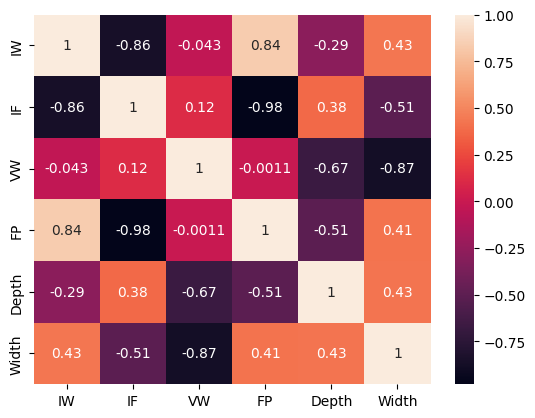

In [8]:
# Вывод матрицы корреляции для оценки степени линейной зависимости между признаками
sns.heatmap(df.corr(), annot=True)

для линейной модели выбираем показатель VW, который имеет максимальную корреляцию с искомыми значениями Depth , Width

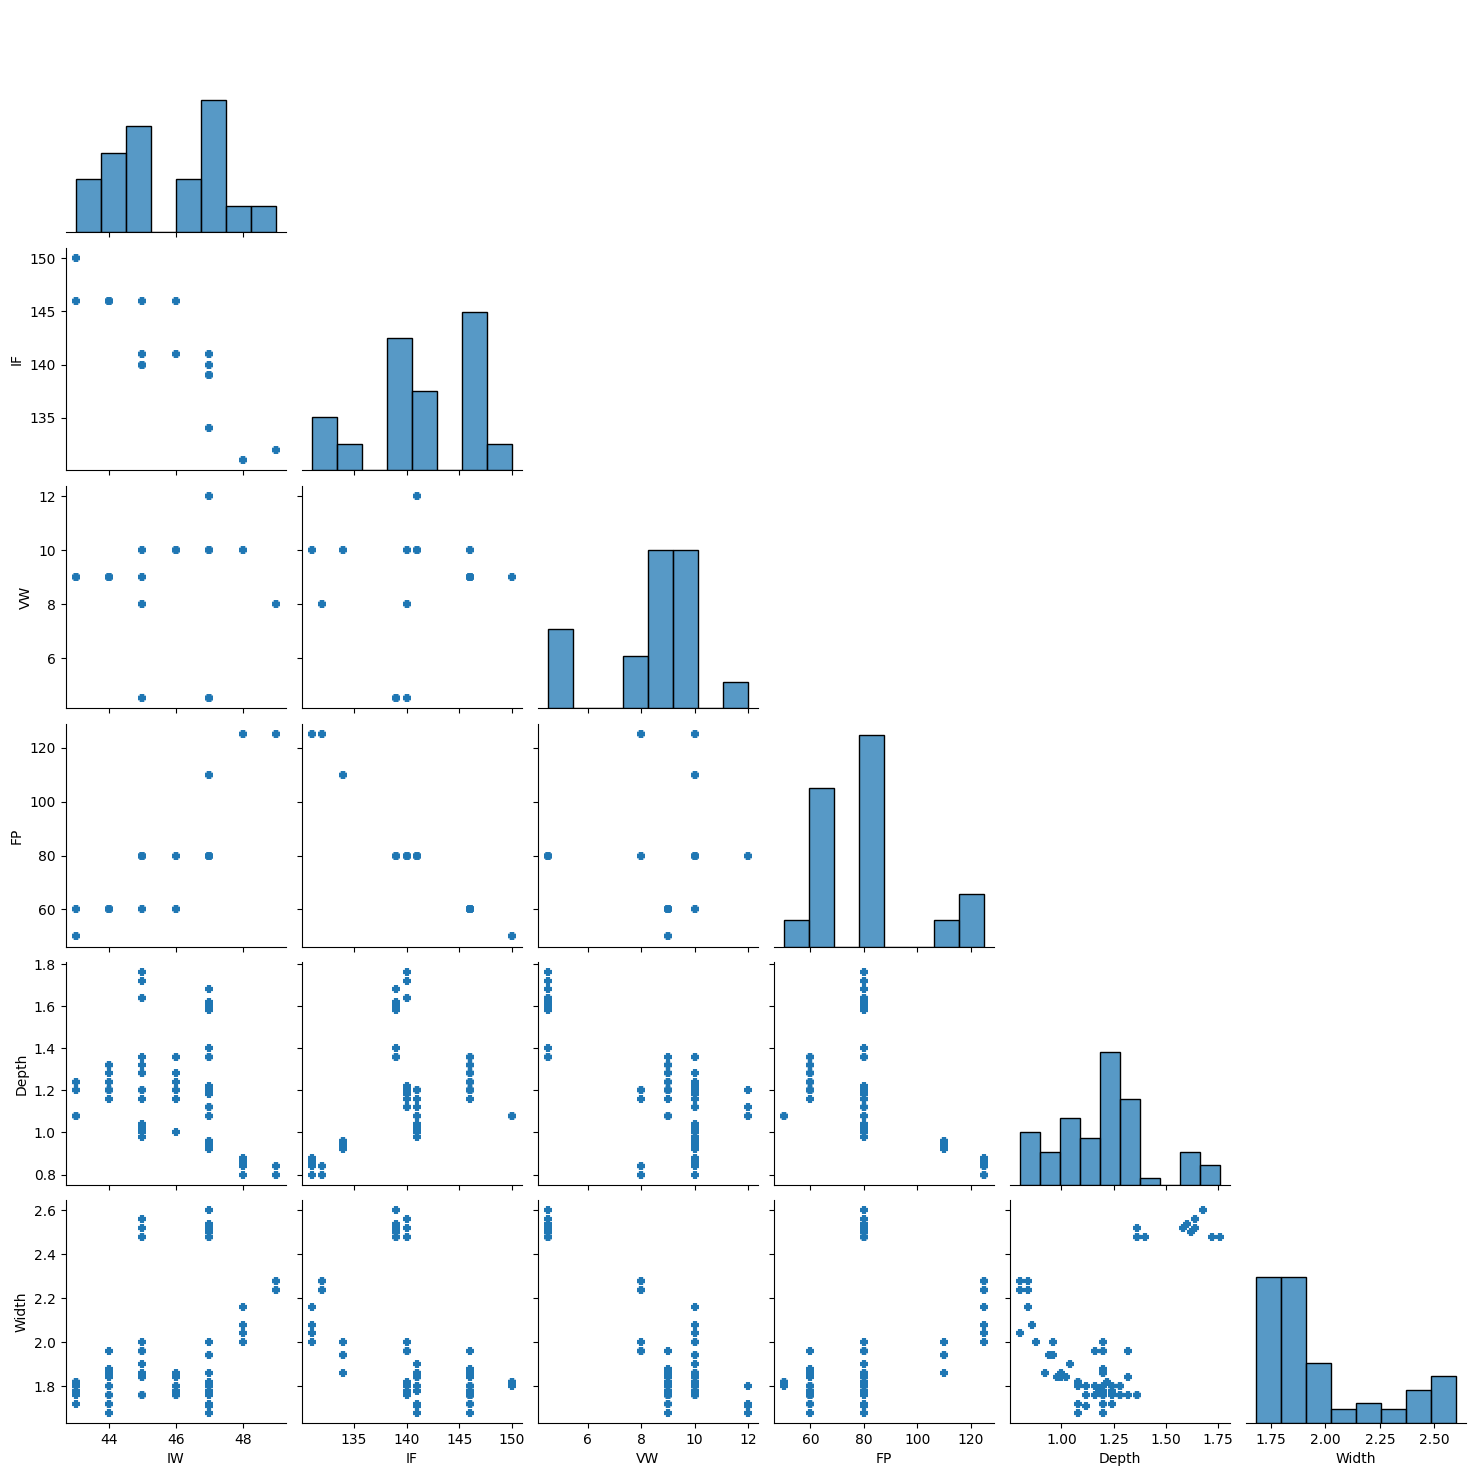

In [9]:
# визуализация сравнения столбцов между собой
sns.pairplot(df, diag_kind = "hist", corner = True, plot_kws = dict(marker = "+", linewidth = 3))

Так как ни один из графиков не похож на нормальное распределение (колокольчик), то в дальнейшем для нормализации буду применять MinMaxScaler , а не StandartScaler из библиотеки sklearn

In [10]:
# Проверим набор данные на пропуски
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [11]:
# Ура, пропусков нет

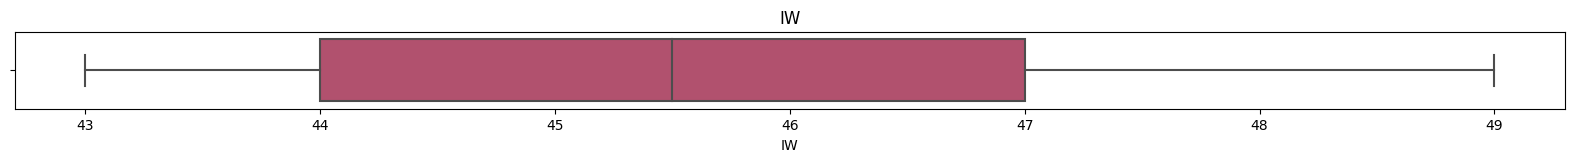

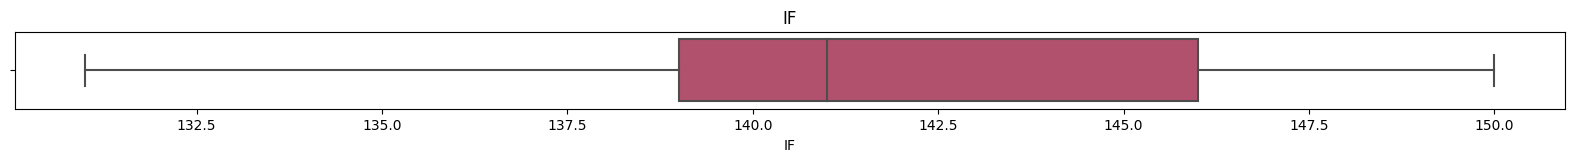

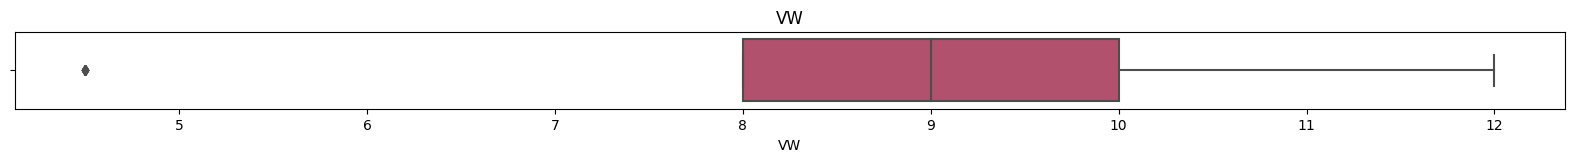

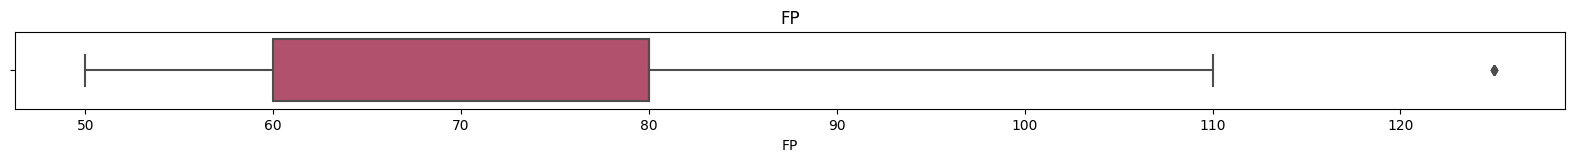

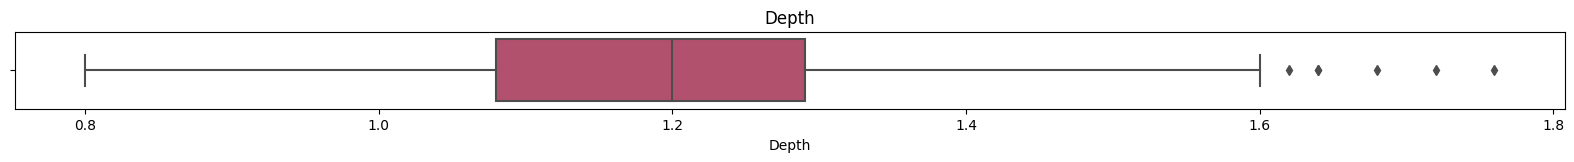

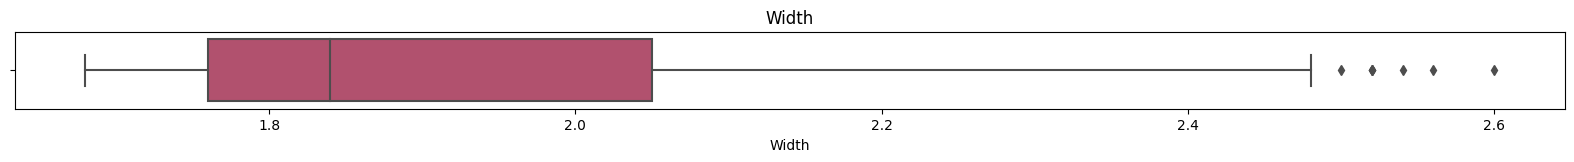

In [12]:
# Построим графики, чтобы наглядно посмотреть на разброс входных данных
for column in df[['IW','IF','VW','FP', 'Depth', 'Width']]:
        plt.figure(figsize = (20,1))
        plt.title(column)
        sns.boxplot(data = df, x = column, palette = "flare", orient="h")

<Axes: >

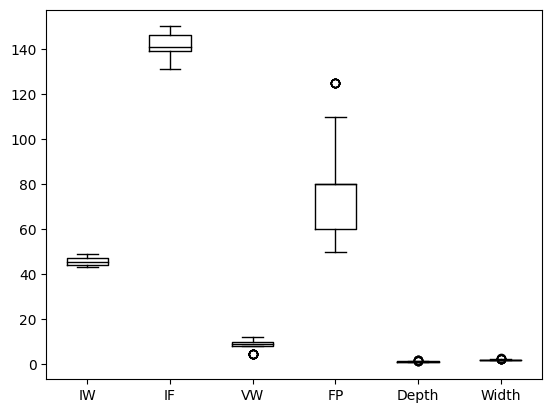

In [13]:
df.boxplot(column=['IW','IF','VW','FP', 'Depth', 'Width'], grid= False , color='black')

# Подготовка датасета

In [14]:
# подготовка датасета для предиктивной модели. Убираем из датасета таргеты. Также готовим датафреймы таргетов: один (с 2-мя таргетами), и каждый таргет отдельно.
X = df.drop(["Width", "Depth"], axis=1)
Y = df[["Width", "Depth"]].copy()
Y_W = df[["Width"]].copy()
Y_D = df[["Depth"]].copy()

In [15]:
X.describe()

,IW,IF,VW,FP
count,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333
std,1.678363,5.145763,2.061078,21.493530
min,43.000000,131.000000,4.500000,50.000000
25%,44.000000,139.000000,8.000000,60.000000
50%,45.500000,141.000000,9.000000,80.000000
75%,47.000000,146.000000,10.000000,80.000000
max,49.000000,150.000000,12.000000,125.000000


In [16]:
# Нормализация данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
# просмотр нормализованных данных
X

array([[0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.46666667, 0.4       ],
       [0.33333333, 0.47368421, 0.46666667, 0.4       ],
       [0.33333333, 0.47368421, 0.46666667, 0.4       ],
       [0.33333333, 0.47368421, 0.46666667, 0.4       ],
       [0.33333333, 0.52631579, 0.73333333, 0.4       ],
       [0.33333333, 0.52631579, 0.73333333, 0.4       ],
       [0.33333333, 0.52631579, 0.73333333, 0.4       ],
       [0.33333333, 0.52631579, 0.73333333, 0.4       ],
       [0.5       , 0.52631579, 0.73333333, 0.4       ],
       [0.5       , 0.52631579,

In [18]:
# трансформация датафрейма в массив numpy
Y = Y.to_numpy()

In [19]:
# разбиение выборки на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=19,
                                                    shuffle=True)

# Создание, обучение и оценка модели RandomForest

In [20]:
from sklearn.ensemble import RandomForestRegressor # импорт модели из библиотеки
# from sklearn.metrics import recall_score
model_rfc = RandomForestRegressor()

In [21]:
# установление параметров для модели
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}

In [22]:
Y_train.size, X_train.size

(100, 200)

In [23]:
# обучение модели
model_rfc.fit(X_train, Y_train)

RandomForestRegressor()

In [24]:
#предсказание на основе тестовых данных
y_rfr = model_rfc.predict(X_test)

In [25]:
# просмотр основных метрик качества модели
print("Среднеквадратичная ошибка модели RandomForest (MSE):", mean_squared_error(Y_test, y_rfr))
print("Средняя абсолютная ошибка модели RandomForest(MAE):", mean_absolute_error(Y_test, y_rfr))
print("Коэффициент детерминации модели RandomForest (R2):", r2_score(Y_test, y_rfr))

Среднеквадратичная ошибка модели RandomForest (MSE): 0.003254033958311285
Средняя абсолютная ошибка модели RandomForest(MAE): 0.045369109000773095
Коэффициент детерминации модели RandomForest (R2): 0.9406445203793738


In [ ]:
import pickle
with open('model_rfc_pkl.pkl', 'wb') as f:
  pickle.dump(model_rfc, f)

# Создание, обучение и оценка модели MultiOutputRegressor

In [ ]:
# создание модели, под капотом две линейные регрессии, которые превращаются в единую модель
model = MultiOutputRegressor(tree.DecisionTreeRegressor())

In [ ]:
# обучение модели
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor())

In [ ]:
# предсказание
y_pred = model.predict(X_test)

In [ ]:
# абсалютная ошибка в каждом предсказанном значении
y_pred - Y_test

array([[-0.01333333,  0.06666667],
       [-0.04      , -0.01333333],
       [ 0.05333333,  0.06666667],
       [ 0.05333333,  0.10666667],
       [-0.00666667,  0.        ],
       [ 0.03333333, -0.15333333],
       [-0.05333333, -0.08      ],
       [-0.03      ,  0.03      ],
       [ 0.01333333,  0.09333333],
       [-0.05      , -0.07      ],
       [ 0.08      ,  0.03      ],
       [ 0.06      ,  0.04      ],
       [-0.05333333, -0.04      ],
       [ 0.        ,  0.04      ],
       [-0.02      ,  0.        ],
       [ 0.086     ,  0.036     ],
       [-0.06      , -0.01      ],
       [ 0.01333333, -0.11333333],
       [ 0.02      ,  0.04      ],
       [-0.00666667, -0.13333333],
       [-0.02666667, -0.02666667],
       [ 0.046     ,  0.036     ]])

In [ ]:
# абсалютная ошибка
mean_absolute_error(Y_test, model.predict(X_test), multioutput='raw_values')

array([0.03721212, 0.05569697])

In [ ]:
#  просмотр основных метрик качества модели
print("Среднеквадратичная ошибка модели MultiOutputRegressor (MSE):", mean_squared_error(Y_test, y_pred))
print("Средняя абсолютная ошибка модели MultiOutputRegressor (MAE):", mean_absolute_error(Y_test, y_pred))
print("Коэффициент детерминации модели MultiOutputRegressor (R2):", r2_score(Y_test, y_pred))

Среднеквадратичная ошибка модели MultiOutputRegressor (MSE): 0.0033846868686868694
Средняя абсолютная ошибка модели MultiOutputRegressor (MAE): 0.04645454545454545
Коэффициент детерминации модели MultiOutputRegressor (R2): 0.9382506895501893


# Создание, обучение и оценка модели LinearRegression для предсказания Depth

In [ ]:
# Создаем датасет для предсказания Depth
X_VW = df["VW"].copy()
# трансформация датафрейма в массив numpy
X_VW = X_VW.to_numpy()
# трансформация массива из строки в столбец
X_VW = np.array(X_VW).reshape((-1, 1))

In [ ]:
# разбиение выборки на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X_VW,
                                                    Y_D,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=19,
                                                    shuffle=True)

In [ ]:
# создание и обучение модели
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred_l = model_lr.predict(X_test)

In [ ]:
# абсалютная ошибка по каждому значению
y_pred_l - Y_test

,Depth
6,-0.152165
8,0.039957
30,0.087835
29,0.127835
54,0.089134
1,-0.132165
18,-0.101688
42,-0.021688
47,-0.141688
41,-0.121688


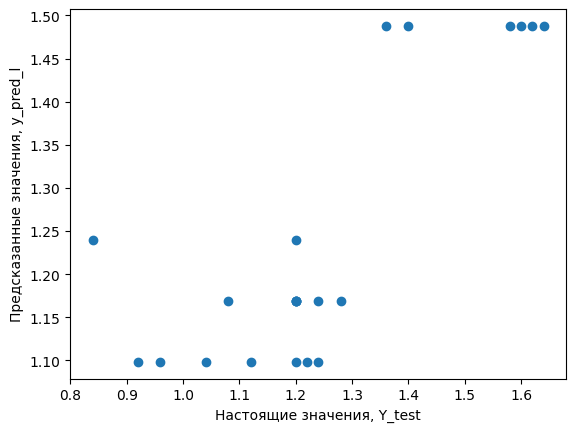

In [ ]:
plt.scatter(Y_test, y_pred_l)
plt.xlabel("Настоящие значения, Y_test")
plt.ylabel("Предсказанные значения, y_pred_l")
plt.show()

In [ ]:
print("Среднеквадратичная ошибка модели LinearRegression для предсказания Depth (MSE):", mean_squared_error(Y_test, y_pred_l))
print("Средняя абсолютная ошибка модели LinearRegression для предсказания Depth (MAE):", mean_absolute_error(Y_test, y_pred_l))
print("Коэффициент детерминации модели LinearRegression для предсказания Depth (R2):", r2_score(Y_test, y_pred_l))

Среднеквадратичная ошибка модели LinearRegression для предсказания Depth (MSE): 0.01710929074860598
Средняя абсолютная ошибка модели LinearRegression для предсказания Depth (MAE): 0.10455726092089733
Коэффициент детерминации модели LinearRegression для предсказания Depth (R2): 0.6316392625431356


In [ ]:
# Коэффициент детерминации у линейной регрессии значительно ниже чем у ранее использованных моделей, но это было понятно по графику корреляции VW и Depth равным 0,67

# Создание, обучение и оценка модели LinearRegression для предсказания Width

In [ ]:
# Создаем датасет для предсказания Width
X_VW = df["VW"].copy()
# трансформация датафрейма в массив numpy
X_VW = X_VW.to_numpy()
# трансформация массива из строки в столбец
X_VW = np.array(X_VW).reshape((-1, 1))

In [ ]:
# разбиение выборки на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X_VW,
                                                    Y_W,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=19,
                                                    shuffle=True)

In [ ]:
# создание и обучение модели
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# предсказание
y_pred_l2 = model_lr.predict(X_test)

In [ ]:
# абсалютная ошибка по каждому значению
y_pred_l2 - Y_test

,Width
6,-0.080440
8,0.047307
30,-0.040440
29,-0.040440
54,0.115234
1,-0.060440
18,-0.036838
42,0.023162
47,0.063162
41,0.003162


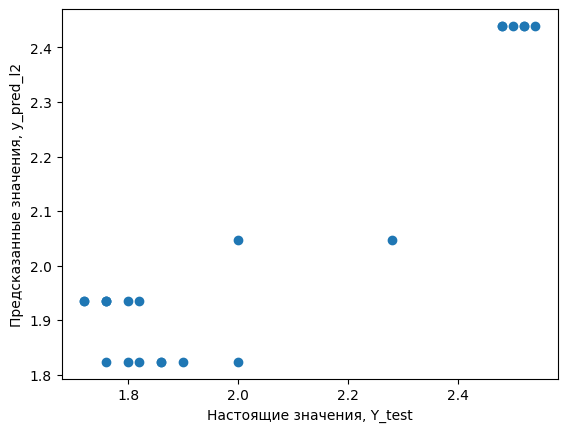

In [ ]:
plt.scatter(Y_test, y_pred_l2)
plt.xlabel("Настоящие значения, Y_test")
plt.ylabel("Предсказанные значения, y_pred_l2")
plt.show()

In [ ]:
print("Среднеквадратичная ошибка модели LinearRegression для предсказания Width (MSE):", mean_squared_error(Y_test, y_pred_l2))
print("Средняя абсолютная ошибка модели LinearRegression для предсказания Width (MAE):", mean_absolute_error(Y_test, y_pred_l2))
print("Коэффициент детерминации модели LinearRegression для предсказания Width (R2):", r2_score(Y_test, y_pred_l2))

Среднеквадратичная ошибка модели LinearRegression для предсказания Width (MSE): 0.01577741133065129
Средняя абсолютная ошибка модели LinearRegression для предсказания Width (MAE): 0.10482356027810574
Коэффициент детерминации модели LinearRegression для предсказания Width (R2): 0.8409972289169361


In [ ]:
# Коэффициент детерминации у линейной регрессии значительно ниже чем у ранее использованных моделей, но это было понятно по графику корреляции VW и Width равным 0,87

**Общий вывод:** модели учитывающие несколько влиящих переменных (Randon Forest and MultiOutputRegressor) показали себя значительно лучше (метрики качества выше) , чем класическая модель линейней регресии.